In [1]:
import pandas as pd 
import numpy as np 

In [2]:
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
   

In [3]:
housingfile = 'housing_boston.csv' 

In [4]:
df= pd.read_csv (housingfile, header=None)

In [5]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
'TAX', 'PTRATIO', 'AA','LSTAT', 'MEDV'] 

In [6]:
df = pd.read_csv(housingfile, names=names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
AA         0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df2= df[['CRIM','INDUS', 'TAX','MEDV']] 
 

In [9]:
df2.head()

,CRIM,INDUS,TAX,MEDV
0,0.00632,2.31,296,24.0
1,0.02731,7.07,242,21.6
2,0.02729,7.07,242,34.7
3,0.03237,2.18,222,33.4
4,0.06905,2.18,222,36.2


In [10]:
print(df2.shape)

(452, 4)


In [11]:
print(df2.dtypes)

CRIM     float64
INDUS    float64
TAX        int64
MEDV     float64
dtype: object


In [12]:
print(df2.describe())

             CRIM       INDUS         TAX        MEDV
count  452.000000  452.000000  452.000000  452.000000
mean     1.420825   10.304889  377.442478   23.750442
std      2.495894    6.797103  151.327573    8.808602
min      0.006320    0.460000  187.000000    6.300000
25%      0.069875    4.930000  276.750000   18.500000
50%      0.191030    8.140000  307.000000   21.950000
75%      1.211460   18.100000  411.000000   26.600000
max      9.966540   27.740000  711.000000   50.000000


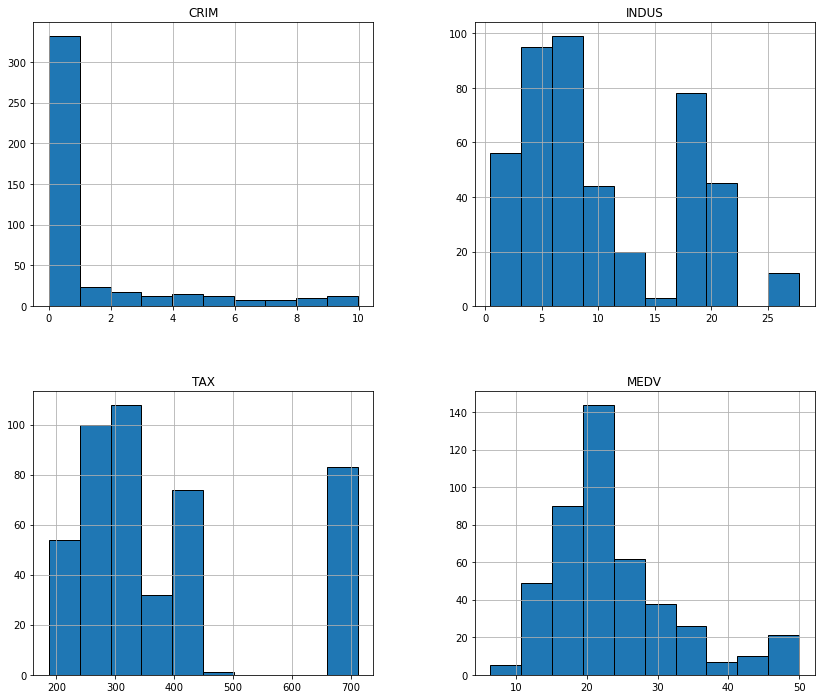

In [13]:
df2.hist(edgecolor= 'black',figsize=(14,12)) 
plt.show() 

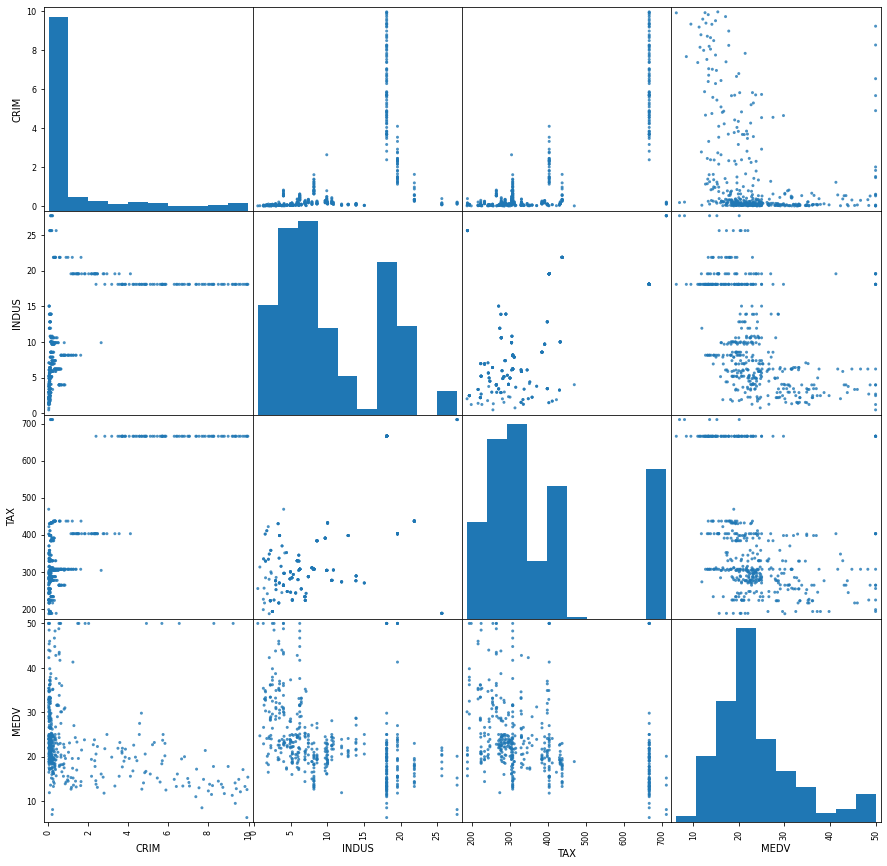

In [14]:
scatter_matrix(df2, alpha=0.8, figsize=(15, 15)) 
plt.show() 

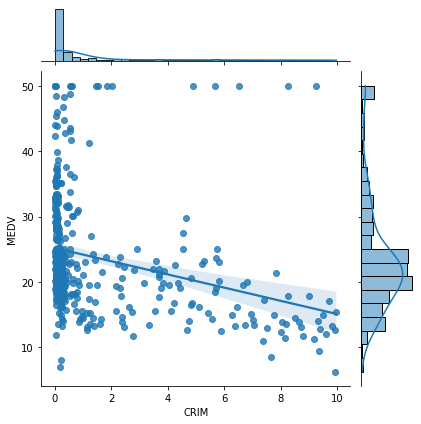

In [15]:
sns.jointplot(data=df2, x="CRIM", y="MEDV", kind="reg")

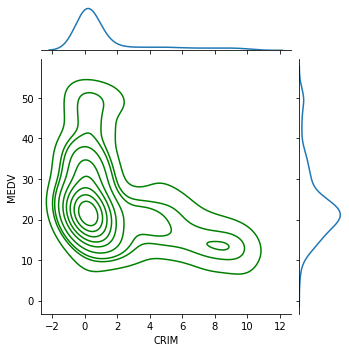

In [16]:
sns.jointplot(x = 'CRIM', y = 'MEDV', data = df2, kind = 'kde', height = 5, 
joint_kws={'color':'green'}) 
plt.show() 

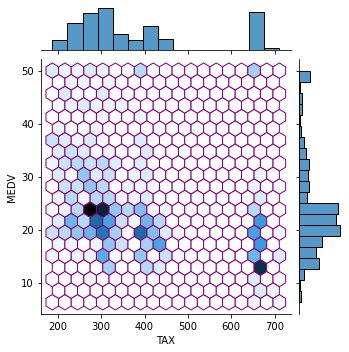

In [17]:
sns.jointplot(x = 'TAX', y = 'MEDV', data = df2, kind = 'hex', height = 5, 
joint_kws={'color':'purple'}) 
plt.show() 

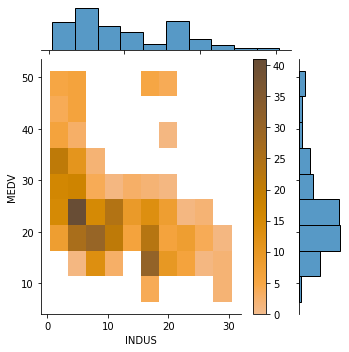

In [18]:
sns.jointplot(x = 'INDUS', y = 'MEDV', data = df2, kind = 'hist', height = 5, 
joint_kws={'color':'orange'}, binwidth=(3,5), cbar=True) 
plt.show() 

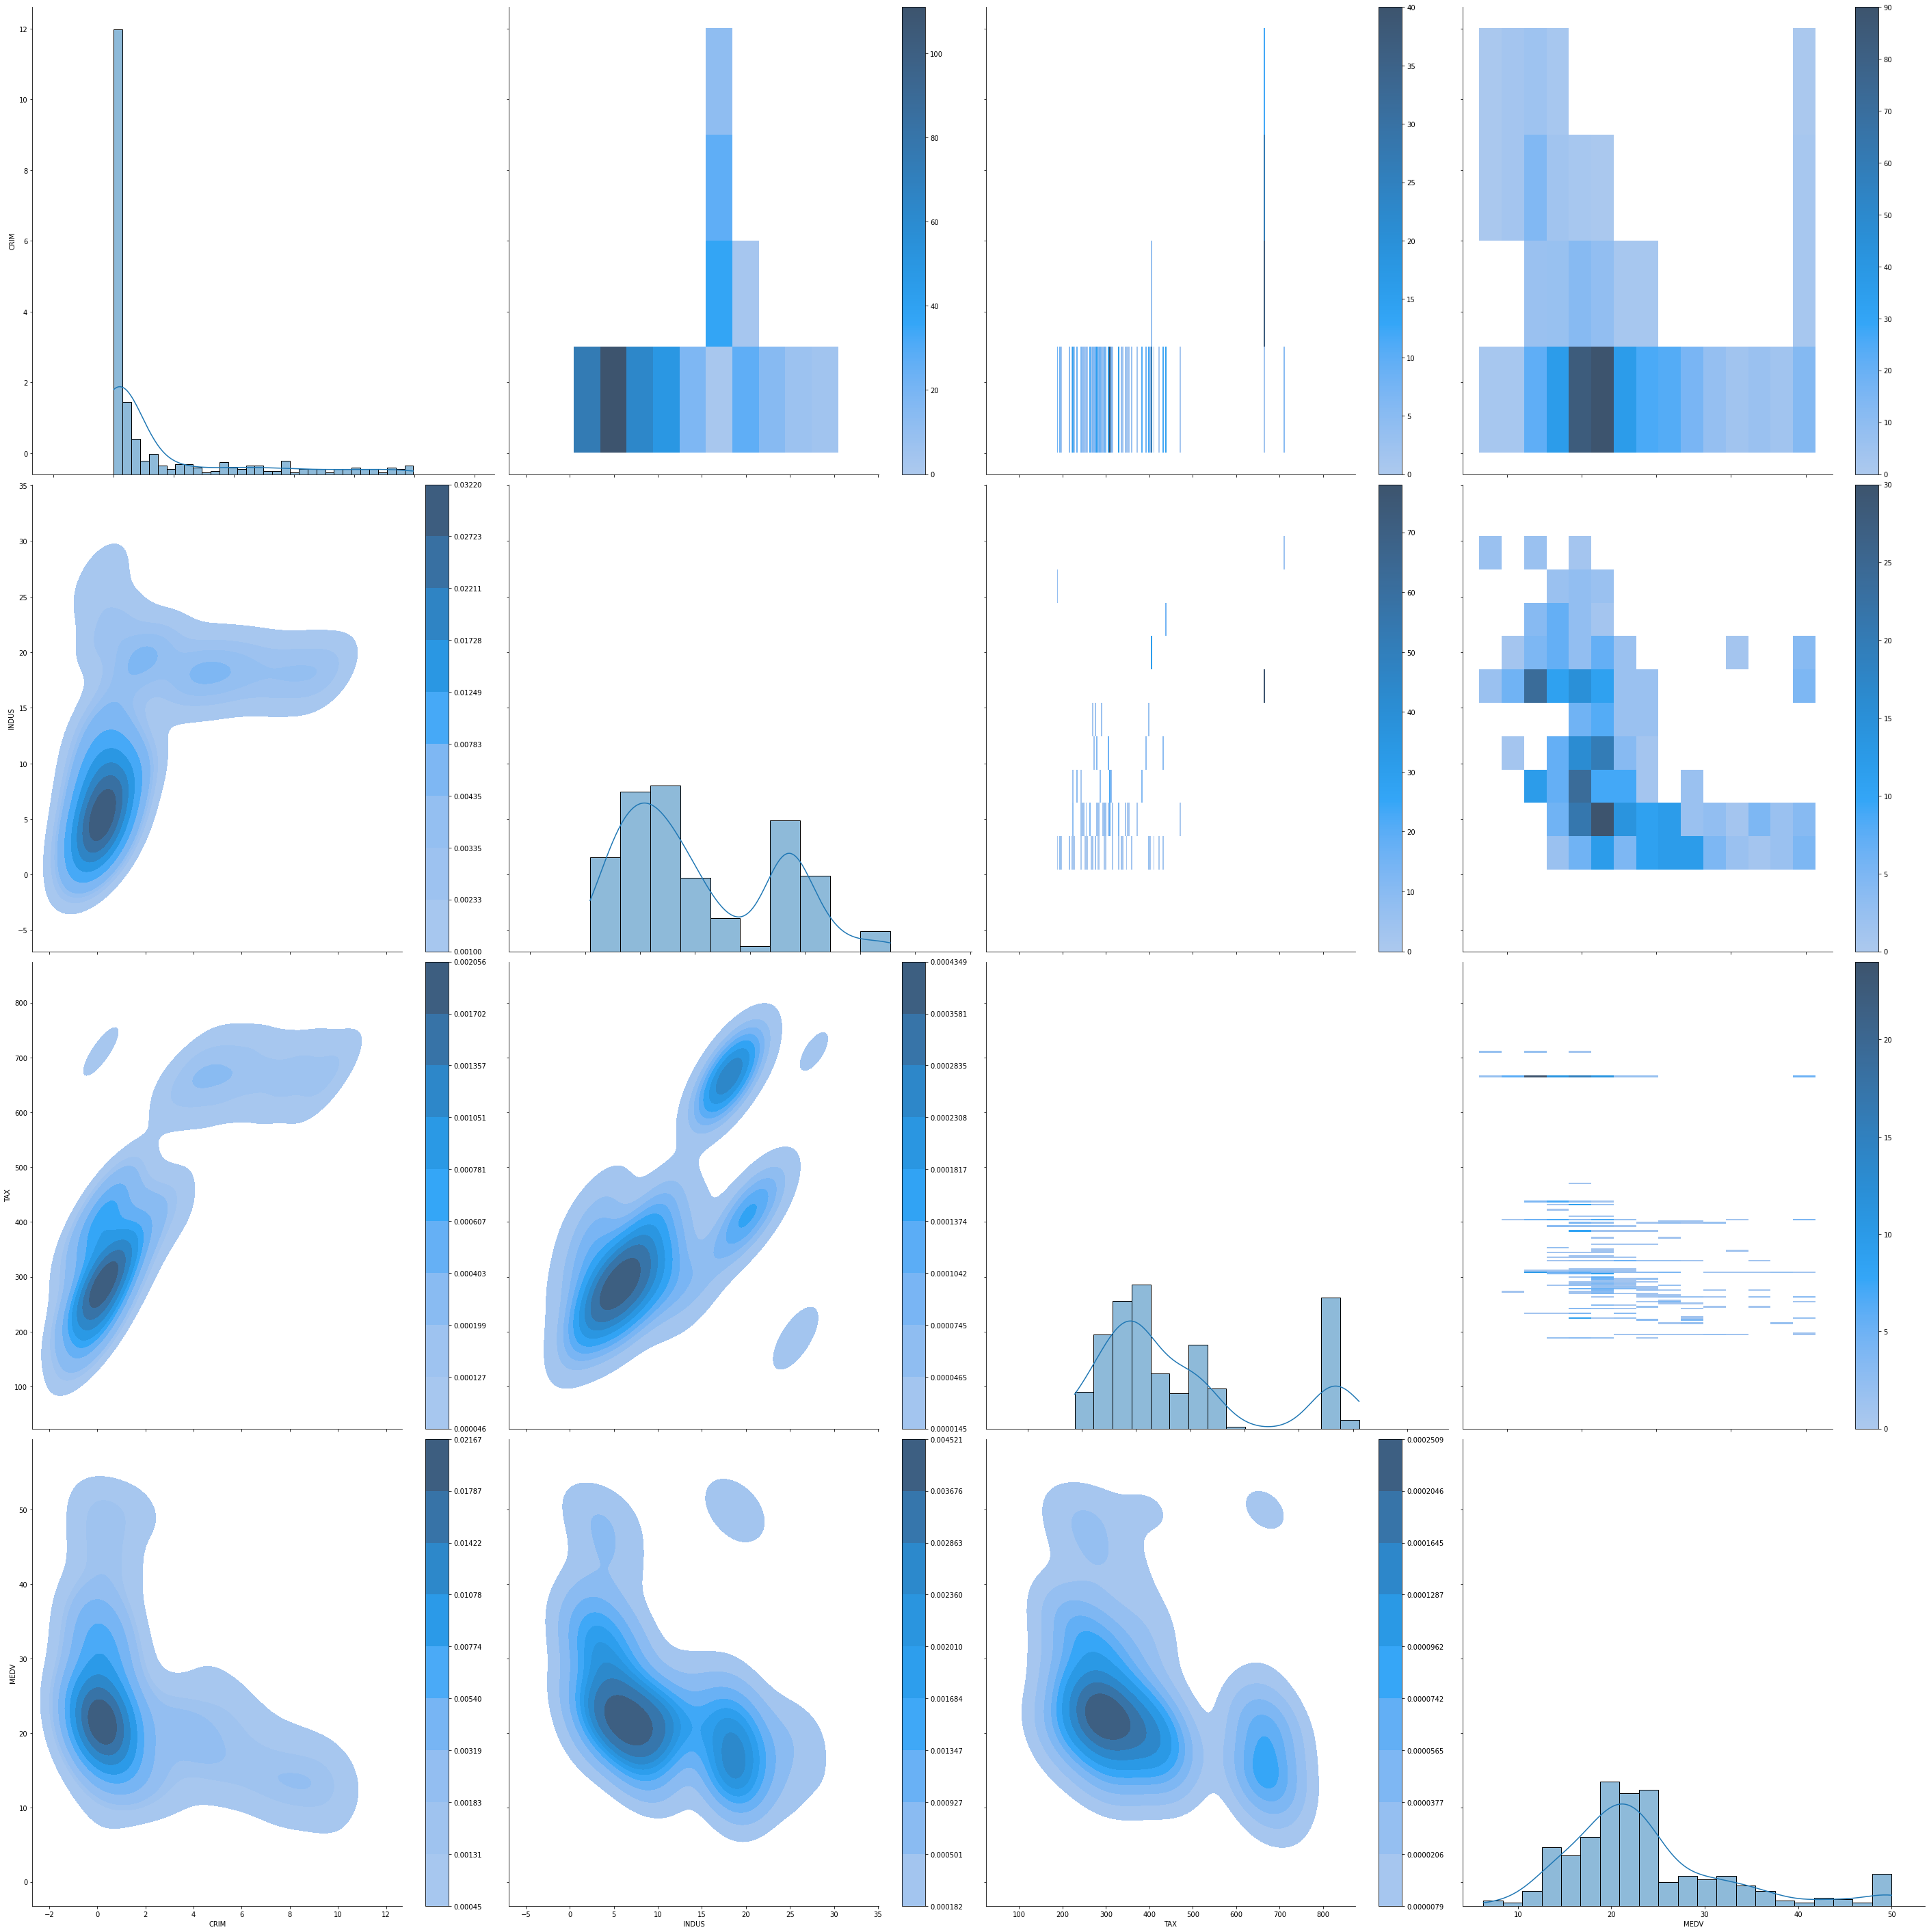

In [19]:
g = sns.PairGrid(df2, height= 10) 
g.map_upper(sns.histplot, bins= 20, binwidth=3, cbar=True) 
g.map_lower(sns.kdeplot, fill=True, cbar=True) 
g.map_diag(sns.histplot, kde=True, cbar=True) 

In [25]:
array = df2.values
X = array [:, 0:3]
Y = array [:, 0:3]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, 
random_state=seed) 

In [26]:
model = DecisionTreeRegressor(random_state=seed)
model.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=7)

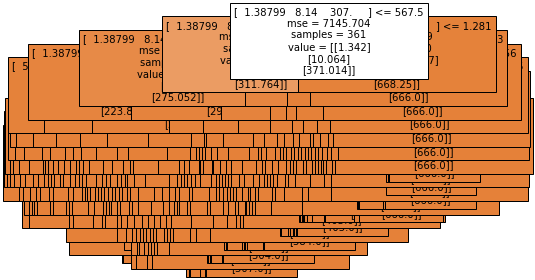

In [27]:
tree.plot_tree(model, feature_names=X_train, class_names=Y_train, filled = 
True, fontsize=10) 
plt.show() 

In [29]:
R_squared = model.score(X_test, Y_test) 
print('R-Squared = ', R_squared) 

R-Squared =  0.9940259709554544


In [28]:
model.predict([[12,10,450]])
model.predict([[2,30,50]])

array([[  0.38735,  25.65   , 188.     ]])

In [34]:
num_folds = 10
seed = 7
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean()) 
 

Average of all results from the K-fold Cross Validation, using negative mean squared error: -3.506226311646305
